## PROYECTO 1: Manipulación de datos

### 1. Objetivos:
    - Tomarás la información de algunas fuentes, la organizarás de forma que se puedan extraer algunos datos y mostrarás algunos gráficos con la información.
 
---
    
### 2. Detalles del proyecto:

    - El proyecto que realizarás estará enfocado en:

         - La obtención de la información:

                Tomarás la información de varias fuentes: Tablas de SQL, archivos de CSV y peticiones de internet.

        - Unirás la información relacionada

        - Además de organizarla correctamente

        - Con esa información obtendrás las medidas de ubicación vistas en clase:

                Media

                Media ponderada

                Mediana

                Moda

        - Al finalizar, realizarás algunas gráficas o plots mostrando los detalles que te parezcan interesantes de la información.
        
---
    
### 3. Desarrollo:

   ### 3.1 Conexión:

        - Conexión a la base de datos sqlite3 con la información a trabajar

In [1]:
# import el módulo sqlite o mysql
import sqlite3

In [2]:
# realiza una conexión a la base de datos SQLite `movielens.sqlite3`
data_base = "../../Datasets/MovieLens/movielens.sqlite3"
connection = sqlite3.connect(data_base)
connection

In [3]:
# asignar varable para poder realizar modificaciones o consultas a nuestra base de datos
cursor = connection.cursor()

In [4]:
# Consulta SQL para mostrar lista tablas: SHOW TABLES;
# En SQLite3: SELECT name FROM sqlite_master WHERE type='table'
sql = "SELECT name FROM sqlite_master WHERE type='table'"
# ejecuta la consulta
cursor.execute(sql)

In [5]:
# extraer todos los nombres de las tablas e imprimirlos
result = cursor.fetchall()
result

[('occupations',), ('ratings',), ('users',), ('age_ranges',), ('movies',)]

---

### 3.1 Consultas y formato DataFrame:

        - Se generan consultas a las tablas de la BD y se llevan a un formato de Dataframe con Pandas

In [6]:
import pandas as pd

In [7]:
users = pd.read_sql("SELECT * FROM users", connection)
users = users.set_index("user_id", drop=True)
users.head()

,gender,age,occupation,cp
user_id,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [8]:
ratings = pd.read_sql("SELECT * FROM ratings", connection)
ratings = ratings.set_index("user_id", drop=True)
ratings.head()

,movie_id,rating,timestamp
user_id,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


In [9]:
movies = pd.read_sql("SELECT * FROM movies", connection)
movies = movies.set_index("movie_id", drop=True)
movies.head()

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [10]:
age_ranges = pd.read_sql("SELECT * FROM age_ranges", connection)
age_ranges = age_ranges.set_index("age_id", drop=True)
age_ranges.head()

,age_range
age_id,
1,Under 18
18,18-24
25,25-34
35,35-44
45,45-49


In [11]:
# Cerrar nuestro cursor y conexión a la base de datos para no utilizar memoria extra en nuestra computadora
cursor.close()
connection.close()

---

### 3.2 Merge entre tablas de interes:

        - Generación de un dataframe parcial para una posterior limpieza y analisis.

In [12]:
users_rating = pd.merge(users,ratings, left_on='user_id', right_index= True)
users_rating.head()

,gender,age,occupation,cp,movie_id,rating,timestamp
user_id,,,,,,,
1,F,1,10,48067,1193,5,978300760
1,F,1,10,48067,661,3,978302109
1,F,1,10,48067,914,3,978301968
1,F,1,10,48067,3408,4,978300275
1,F,1,10,48067,2355,5,978824291


In [13]:
users_rating_movies = pd.merge(users_rating,movies, left_on='movie_id', right_index= True)
users_rating_movies.head()

,gender,age,occupation,cp,movie_id,rating,timestamp,title,genres
user_id,,,,,,,,,
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama


In [14]:
users_final = pd.merge(users_rating_movies,age_ranges, left_on='age', right_index= True)
users_final.head()

,gender,age,occupation,cp,movie_id,rating,timestamp,title,genres,age_range
user_id,,,,,,,,,,
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18


---

### 3.3 Limpieza y Ordenamiento:

        - Limpieza del Dataframe y ordenamiento de los valores de interes.

In [15]:
df_partial = users_final.drop_duplicates()
df_partial.head()

,gender,age,occupation,cp,movie_id,rating,timestamp,title,genres,age_range
user_id,,,,,,,,,,
1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
19,M,1,10,48073,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
99,F,1,10,19390,1193,2,982791053,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
349,M,1,10,08035,1193,4,1007923963,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
719,M,1,0,75070,1193,4,975527654,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18


In [16]:
df_partial = df_partial.drop(["occupation", "timestamp", "cp"], axis=1)
df_partial

,gender,age,movie_id,rating,title,genres,age_range
user_id,,,,,,,
1,F,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
19,M,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
99,F,1,1193,2,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
349,M,1,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
719,M,1,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
...,...,...,...,...,...,...,...
4766,M,35,1842,4,Illtown (1996),Crime|Drama,35-44
5185,F,35,404,4,Brother Minister: The Assassination of Malcolm...,Documentary,35-44
5433,F,35,286,3,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller,35-44


In [17]:
df_partial = df_partial.rename(
    columns={"age":"age_id",
             "description":"occupation"})
df_partial.head()

,gender,age_id,movie_id,rating,title,genres,age_range
user_id,,,,,,,
1,F,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
19,M,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
99,F,1,1193,2,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
349,M,1,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
719,M,1,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18


In [18]:
df_partial = df_partial.reset_index()
df_partial

,user_id,gender,age_id,movie_id,rating,title,genres,age_range
0,1,F,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,19,M,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
2,99,F,1,1193,2,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
3,349,M,1,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
4,719,M,1,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
...,...,...,...,...,...,...,...,...
1000204,4766,M,35,1842,4,Illtown (1996),Crime|Drama,35-44
1000205,5185,F,35,404,4,Brother Minister: The Assassination of Malcolm...,Documentary,35-44
1000206,5433,F,35,286,3,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller,35-44
1000207,5494,F,35,3530,4,Smoking/No Smoking (1993),Comedy,35-44


In [19]:
df_clean = df_partial.sort_values("user_id", ignore_index = True)
df_clean

,user_id,gender,age_id,movie_id,rating,title,genres,age_range
0,1,F,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,1,F,1,1,5,Toy Story (1995),Animation|Children's|Comedy,Under 18
2,1,F,1,150,5,Apollo 13 (1995),Drama,Under 18
3,1,F,1,2762,4,"Sixth Sense, The (1999)",Thriller,Under 18
4,1,F,1,2791,4,Airplane! (1980),Comedy,Under 18
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,1921,4,Pi (1998),Sci-Fi|Thriller,25-34
1000205,6040,M,25,2852,3,"Soldier's Story, A (1984)",Drama,25-34
1000206,6040,M,25,978,4,"Blue Angel, The (Blaue Engel, Der) (1930)",Drama,25-34
1000207,6040,M,25,3089,5,"Bicycle Thief, The (Ladri di biciclette) (1948)",Drama,25-34


In [20]:
df_clean['gender_id'] = [1 if i =='F' else 0 for i in df_clean['gender']]
df_clean

,user_id,gender,age_id,movie_id,rating,title,genres,age_range,gender_id
0,1,F,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,1
1,1,F,1,1,5,Toy Story (1995),Animation|Children's|Comedy,Under 18,1
2,1,F,1,150,5,Apollo 13 (1995),Drama,Under 18,1
3,1,F,1,2762,4,"Sixth Sense, The (1999)",Thriller,Under 18,1
4,1,F,1,2791,4,Airplane! (1980),Comedy,Under 18,1
...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,1921,4,Pi (1998),Sci-Fi|Thriller,25-34,0
1000205,6040,M,25,2852,3,"Soldier's Story, A (1984)",Drama,25-34,0
1000206,6040,M,25,978,4,"Blue Angel, The (Blaue Engel, Der) (1930)",Drama,25-34,0
1000207,6040,M,25,3089,5,"Bicycle Thief, The (Ladri di biciclette) (1948)",Drama,25-34,0


---

### 3.4 Medidas de Tendencia Central:

        - Media.
        - Media Ponderada.
        - Modiana.
        - Moda.

In [21]:
# MEDIA
df_clean['rating'].mean()

3.581564453029317

In [22]:
# MEDIA PONDERADA 
def weighted_mean(values,weights):
    sum_main= 0
    sum_weighted = 0
    for i in range(len(values)):
        sum_main += values[i]*weights[i]
        sum_weighted += weights[i]

    return sum_main/sum_weighted

weighted_mean(df_clean['rating'], [i for i in df_clean['rating']])

3.9299918795482136

In [23]:
# MEDIANA
df_clean['rating'].median()

4.0

In [24]:
# MODA
df_clean['rating'].mode()

0    4
dtype: int64

---

### 3.5 Graficos y Conclusiones:

        - Se realizan visualizaciones para la comprensión de los datos analizados.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_filter_rating = df_clean.groupby(['rating','gender']).count()['gender_id'].reset_index()
df_filter_rating

,rating,gender,gender_id
0,1,F,13347
1,1,M,42827
2,2,F,24548
3,2,M,83009
4,3,F,62966
5,3,M,198231
6,4,F,87033
7,4,M,261938
8,5,F,58546
9,5,M,167764


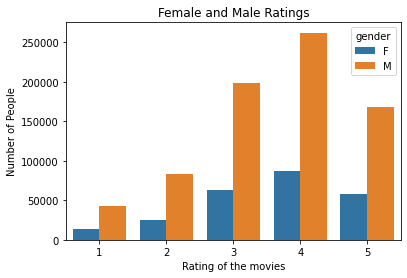

In [27]:
ax = sns.barplot(x ='rating', y ='gender_id', hue= 'gender',data=df_filter_rating)
ax.set( xlabel='Rating of the movies', ylabel='Number of People', title='Female and Male Ratings')
plt.show()

In [28]:
df_clean['age_range'].unique()

array(['Under 18', '56+', '25-34', '45-49', '50-55', '35-44', '18-24'],
      dtype=object)

In [29]:
df_filter_good = df_clean[(df_clean['rating'] == 5) & (df_clean['gender'] == 'M') & (df_clean['age_range'] == '18-24')]
df_good = df_filter_good.groupby('title').count()['gender'].reset_index().sort_values("gender", ignore_index = True, ascending=False).head(10)
df_good

,title,gender
0,American Beauty (1999),365
1,"Matrix, The (1999)",306
2,Star Wars: Episode V - The Empire Strikes Back...,300
3,Star Wars: Episode IV - A New Hope (1977),293
4,Braveheart (1995),277
5,"Shawshank Redemption, The (1994)",260
6,Saving Private Ryan (1998),241
7,"Usual Suspects, The (1995)",238
8,Star Wars: Episode VI - Return of the Jedi (1983),229
9,Pulp Fiction (1994),228


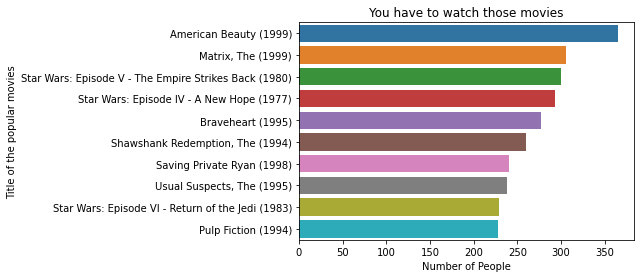

In [30]:
ax = sns.barplot(x ='gender', y ='title',data=df_good)
ax.set( xlabel='Number of People', ylabel='Title of the popular movies', title='You have to watch those movies')
plt.show()

In [31]:
df_filter_bad = df_clean[(df_clean['rating'] == 1) & (df_clean['gender'] == 'M') & (df_clean['age_range'] == '18-24')]
df_bad = df_filter_bad.groupby('title').count()['gender'].reset_index().sort_values("gender", ignore_index = False, ascending=False).head(10)
df_bad

,title,gender
196,Batman & Robin (1997),72
2150,Wild Wild West (1999),66
203,Battlefield Earth (2000),57
1914,Super Mario Bros. (1993),50
270,"Blair Witch Project, The (1999)",45
1300,Mission to Mars (2000),40
448,Congo (1995),38
198,Batman Forever (1995),36
828,Godzilla (1998),34
1878,Starship Troopers (1997),32


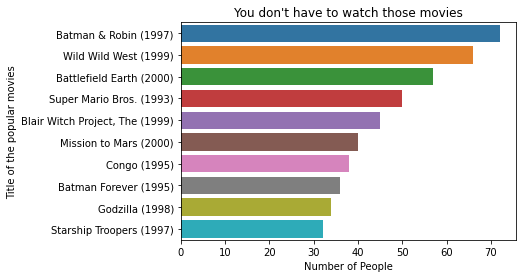

In [32]:
ax = sns.barplot(x ='gender', y ='title',data=df_bad)
ax.set( xlabel='Number of People', ylabel='Title of the popular movies', title="You don't have to watch those movies")
plt.show()